**Context**

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

**Data**

- S.No. : Serial Number
- Name : Name of the car which includes Brand name and Model name
- Location : The location in which the car is being sold or is available for purchase Cities
- Year : Manufacturing year of the car
- Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
- Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission : The type of transmission used by the car. (Automatic / Manual)
- Owner : Type of ownership
- Mileage : The standard mileage offered by the car company in kmpl or km/kg
- Engine : The displacement volume of the engine in CC.
- Power : The maximum power of the engine in bhp.
- Seats : The number of seats in the car.
- New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
- Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

**Objective**

- Explore and visualize the dataset.
- Build a linear regression model to predict the prices of used cars.
- Generate a set of insights and recommendations that will help the business.

## Data structure and initial observations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import *
from sklearn.linear_model import *

%matplotlib inline

In [2]:
data = pd.read_csv('used_cars_data.csv')   # the original data

In [3]:
df = data.copy()   # copy the data to df

In [27]:
df.head()   # display the first 5 rows

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [31]:
df.sample(5)   # randomly display 5 rows

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1302,1302,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,57456,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,21.56
2426,2426,Maruti Wagon R LXI BSIII,Pune,2007,83000,Petrol,Manual,First,14.0 kmpl,1061 CC,64 bhp,5.0,NaN,1.65
4860,4860,Maruti Alto K10 2010-2014 VXI,Hyderabad,2013,30131,Petrol,Manual,First,20.92 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
773,773,Maruti Ritz VXi,Kolkata,2011,50000,Petrol,Manual,Second,18.5 kmpl,1197 CC,85.80 bhp,5.0,NaN,1.50
3495,3495,Maruti Wagon R LXI BS IV,Pune,2010,91000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.30


In [32]:
df.tail()  # display the last 5 rwos

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [8]:
df.shape 

(7253, 14)

In [34]:
df.info()    # data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


**observation:** 
- 7253 rows and 14 columns. Serial number, year, Kilometers_Driven, Seats and price are numerical. Others are objects.
- Name of the car includes Brand name and Model name, which could be seperated into two columns.
- Mileage, engine and Power should be numbers instead of objects.
- Mixed measurements for mileage.
- Lots of missing values in New_Price column.
- Serial number is identical with the index. Since it doesn't provide further information about the data, just drop it.

In [37]:
missing_value_df = pd.DataFrame(df.isnull().sum().sort_values(ascending = False), columns = ['No. of missing values'])   # check missing values for columns
missing_value_df['percentage'] = 100 * missing_value_df.iloc[:,0] / df.shape[0]
missing_value_df

,No. of missing values,percentage
New_Price,6247,86.129877
Price,1234,17.013650
Seats,53,0.730732
Engine,46,0.634220
Power,46,0.634220
Mileage,2,0.027575
S.No.,0,0.000000
Name,0,0.000000
Location,0,0.000000
Year,0,0.000000


**observation:**
- New Price, Price, Seats, Engine, Power and Mileage column have missing values.
- The number of missing values in New_Price is 6247, taking up more than 85% of the total observations. It is impossible to fix by imputation. Better to just drop this column.

In [408]:
df.isnull().sum(axis = 1).value_counts(ascending = False)   # check missing value for rows

1    5335
2    1048
0     823
4      36
5      10
3       1
dtype: int64

**observation:**
- most rows miss 1 element, which is probably the New_Price.

## Data preprocessing - part 1

 #### drop column S.No. and New_Price

In [4]:
df.drop(['S.No.', 'New_Price'], axis = 1, inplace = True)  # drop column S.No. and New_Price
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
phase1 = df.copy()   # delete !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [504]:
df = phase1.copy()    # drop two columns. delete !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#### remove the unit of Power and convert it to number

In [505]:
[x for x in df.Power.unique() if str(x).startswith('null')]   #  some elements in Power column have the value of 'null bhp'

['null bhp']

In [506]:
df.loc[df['Power'] == 'null bhp', 'Power'] = np.nan  # convert them into np.nan

In [507]:
print("Now the number of missing values in Power column: ", df.Power.isnull().sum())

Now the number of missing values in Power column:  175


In [508]:
# remove the unit of Power
isNumber = df.Power.notnull()
df.Power[isNumber] = df.loc[isNumber, 'Power'].str.strip().str.replace(' bhp', '').astype('float64')
df.Power = df.Power.fillna(np.nan)

#### remove the unit of Engine and convert it to number

In [509]:
# remove the unit of Engine
isNumber = df.Engine.notnull()
df.Engine[isNumber] = df.Engine[isNumber].str.strip().str.replace(' CC', '').astype('int64')
df.Engine = df.Engine.fillna(np.nan)

#### remove the unit of Mileage and convert it to number

In [510]:
# take a look at the mileage column, to see why it has mixed units
print('Mileage ending with kmpl: ', df.Mileage.str.endswith('kmpl').sum(), 
      ", fuel type: ", df.loc[df.Mileage.notnull() & df.Mileage.str.endswith('pl'), 'Fuel_Type'].unique())
print('Mileage ending with km/kg: ', df.Mileage.str.endswith('km/kg').sum(), 
      ", fuel type: ", df.loc[df.Mileage.notnull() & df.Mileage.str.endswith('kg'), 'Fuel_Type'].unique())

Mileage ending with kmpl:  7177 , fuel type:  ['Diesel' 'Petrol']
Mileage ending with km/kg:  74 , fuel type:  ['CNG' 'LPG']


In [511]:
df[df.Mileage.isnull()]  # rows with null Mileage value

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75


In [512]:
df[df.Fuel_Type == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75


**observation:** The mileage of cars using Diesel or Petrol is measured by kmpl. The mileage of cars using CNG or LPG is measured by km/kg. Electric cars use km/full charge as the unit of mileage. And the missing values in Mileage column all come from electric cars.

In [513]:
# remove the unit of Mileage
def convert_Mileage(val):
    """
    val: mileage, could be NaN or string which consists of number + km/kg or number + kmpl
    return: np.nan or float.
    """
    if val != val:
        return np.nan
    
    l = val.split(' ')
    return float(l[0])

df.Mileage = df.Mileage.apply(convert_Mileage)

#### data summary

In [514]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0


**observation:** 
- The minimum of Mileage and Seats is 0, which doesn't make sense. Guess these inputs are omitted. Treated them as NaN and do imputation later.
- The number of the combinations of brand name and model name is more than 2000.That is too many to handle. A better solution is to to drop the model name and keep the brand name only. So we need to extract the brand name from the Name column.
- Name, location, Year, Fuel_Type, Transmission, Owner_Type and Seats should be categorical variables.

#### convert Mileage and Seats with value of 0 to NaN

In [515]:
df.loc[df.Mileage == 0, 'Mileage'] = np.nan
df.loc[df.Seats == 0, 'Seats'] = np.nan

In [516]:
phase2 = df.copy()   # delete !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [517]:
df = phase2.copy() # remove units. convert null and 0 to np.nan. delete !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#### extract brand name from Name column

In [518]:
# extract brand name
brands = df.Name.apply(lambda x: x.title().split(' ', maxsplit = 1)[0])   # first convert the name to title, then extract the first word as the brand
pd.DataFrame(brands.unique())

,0
0,Maruti
1,Hyundai
2,Honda
3,Audi
4,Nissan
5,Toyota
6,Volkswagen
7,Tata
8,Land
9,Mitsubishi


**observation:** 
- If the name of brand has more than one word, the above stategy won't get it right.
- Ambassador is a mobel name. It belongs to Hindustan Motors.
- Opelcorsa is a model name. It belongs to Opel.

In [519]:
update_brands = {'Force' :'Force One',
                 'Land': 'Land Rover',
                 'Ambassador': 'Hindustan',
                 'Opelcorsa': 'Opel'}

for before, after in update_brands.items():
    brands = brands.str.replace(before, after)

In [520]:
pd.DataFrame(brands.unique())

,0
0,Maruti
1,Hyundai
2,Honda
3,Audi
4,Nissan
5,Toyota
6,Volkswagen
7,Tata
8,Land Rover
9,Mitsubishi


In [521]:
df['Brand'] = brands
df.drop('Name', axis = 1, inplace = True)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


#### convert Location, Year, Fuel_Type, Transmission, Owner_Type, Seats, Brand into categorical variable

In [522]:
categorical_columns = ['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand']
for col in categorical_columns:
    df[col] = df[col].astype('category') 

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   category
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7170 non-null   float64 
 7   Engine             7207 non-null   float64 
 8   Power              7078 non-null   float64 
 9   Seats              7199 non-null   category
 10  Price              6019 non-null   float64 
 11  Brand              7253 non-null   category
dtypes: category(7), float64(4), int64(1)
memory usage: 336.3 KB


**observation:** Now we have all the columns as categorical data except Kilometers_Driven, Mileage, Engine, Power and Price.

In [524]:
phase3 = df.copy()   # delete !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [525]:
df = phase3.copy() # convert to categorical variables. extract brand name from name column. delete !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

## EDA

In [526]:
df.describe(include = 'category').T   # summary for categorical variables

,count,unique,top,freq
Location,7253,11,Mumbai,949
Year,7253,23,2015,929
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952
Seats,7199.0,8.0,5.0,6047.0
Brand,7253,31,Maruti,1444


**observation:** 
- Top location is Mumbai. Top manufacturing year is 2015.
- About 50% of the cars for sale use Diesel.
- Most used cars are manual transmission, with only one previous owner and five seats.
- The total number of brands is 31. Maruti is the brand that occurs most frequently.

In [527]:
df.describe().T   # summary for numerical variables

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.00
Mileage,7170.0,18.346527,4.157910,6.40,15.3,18.20,21.10,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.0,1493.00,1968.00,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.0,94.00,138.10,616.00
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.00


**observation:**
- The mean and median of Mileage are similar.
- All the other vairables have right skewed distribution.

### Univariate analysis

#### histogram and boxplot of all numerical variables

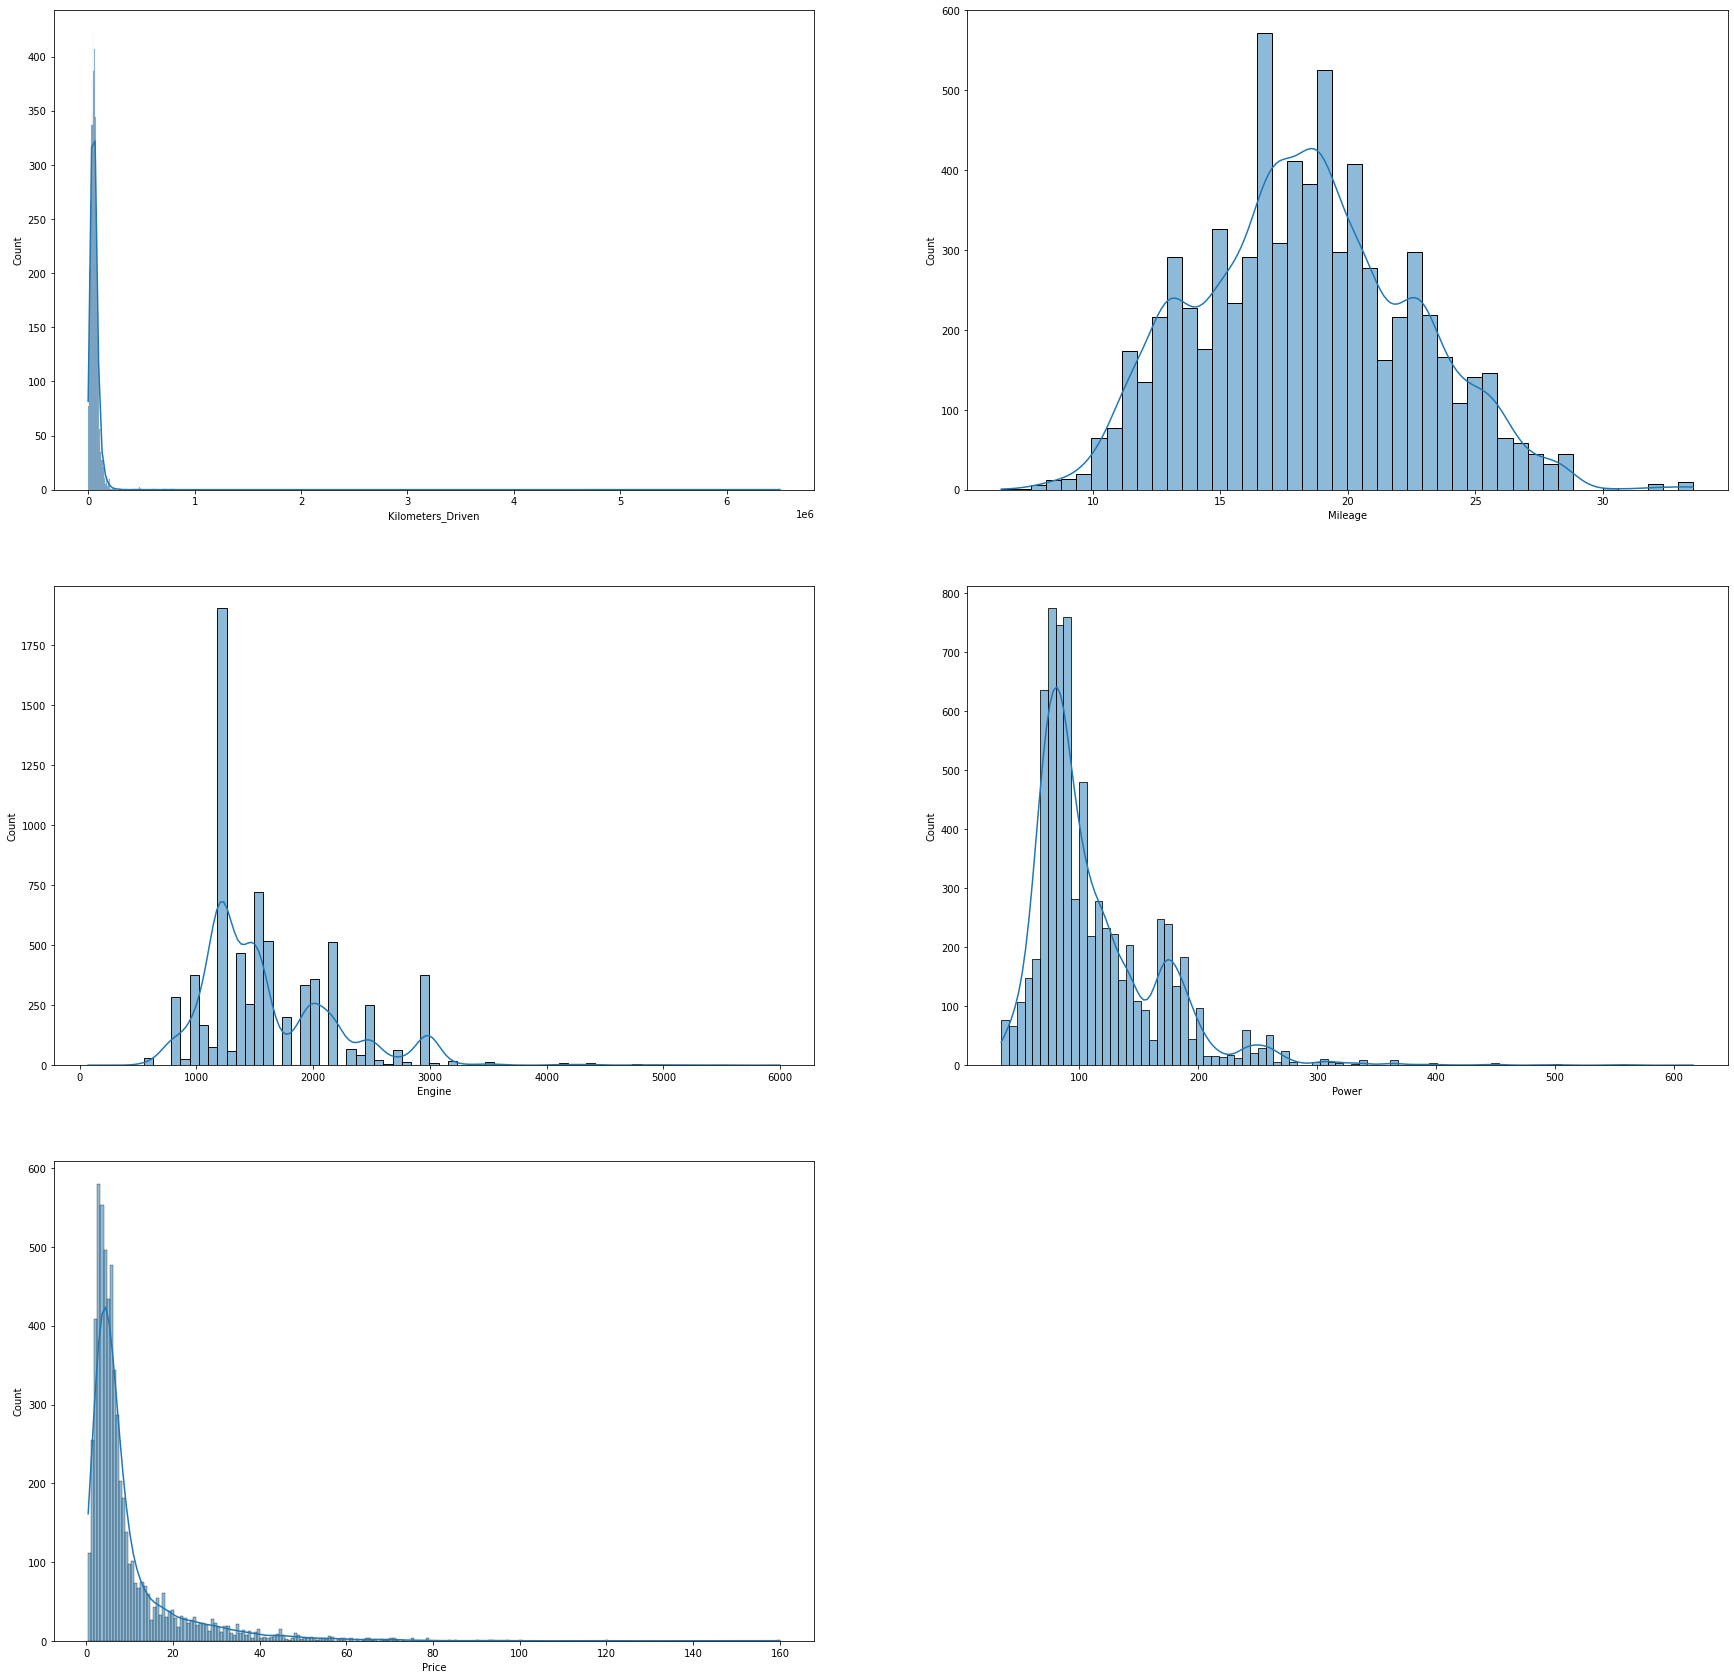

In [528]:
numerical_columns = [col for col in df.columns if col not in categorical_columns]     # generate numercial_columns

plt.figure(figsize = (30, 30))     # histogram for numercial variables
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde = True)

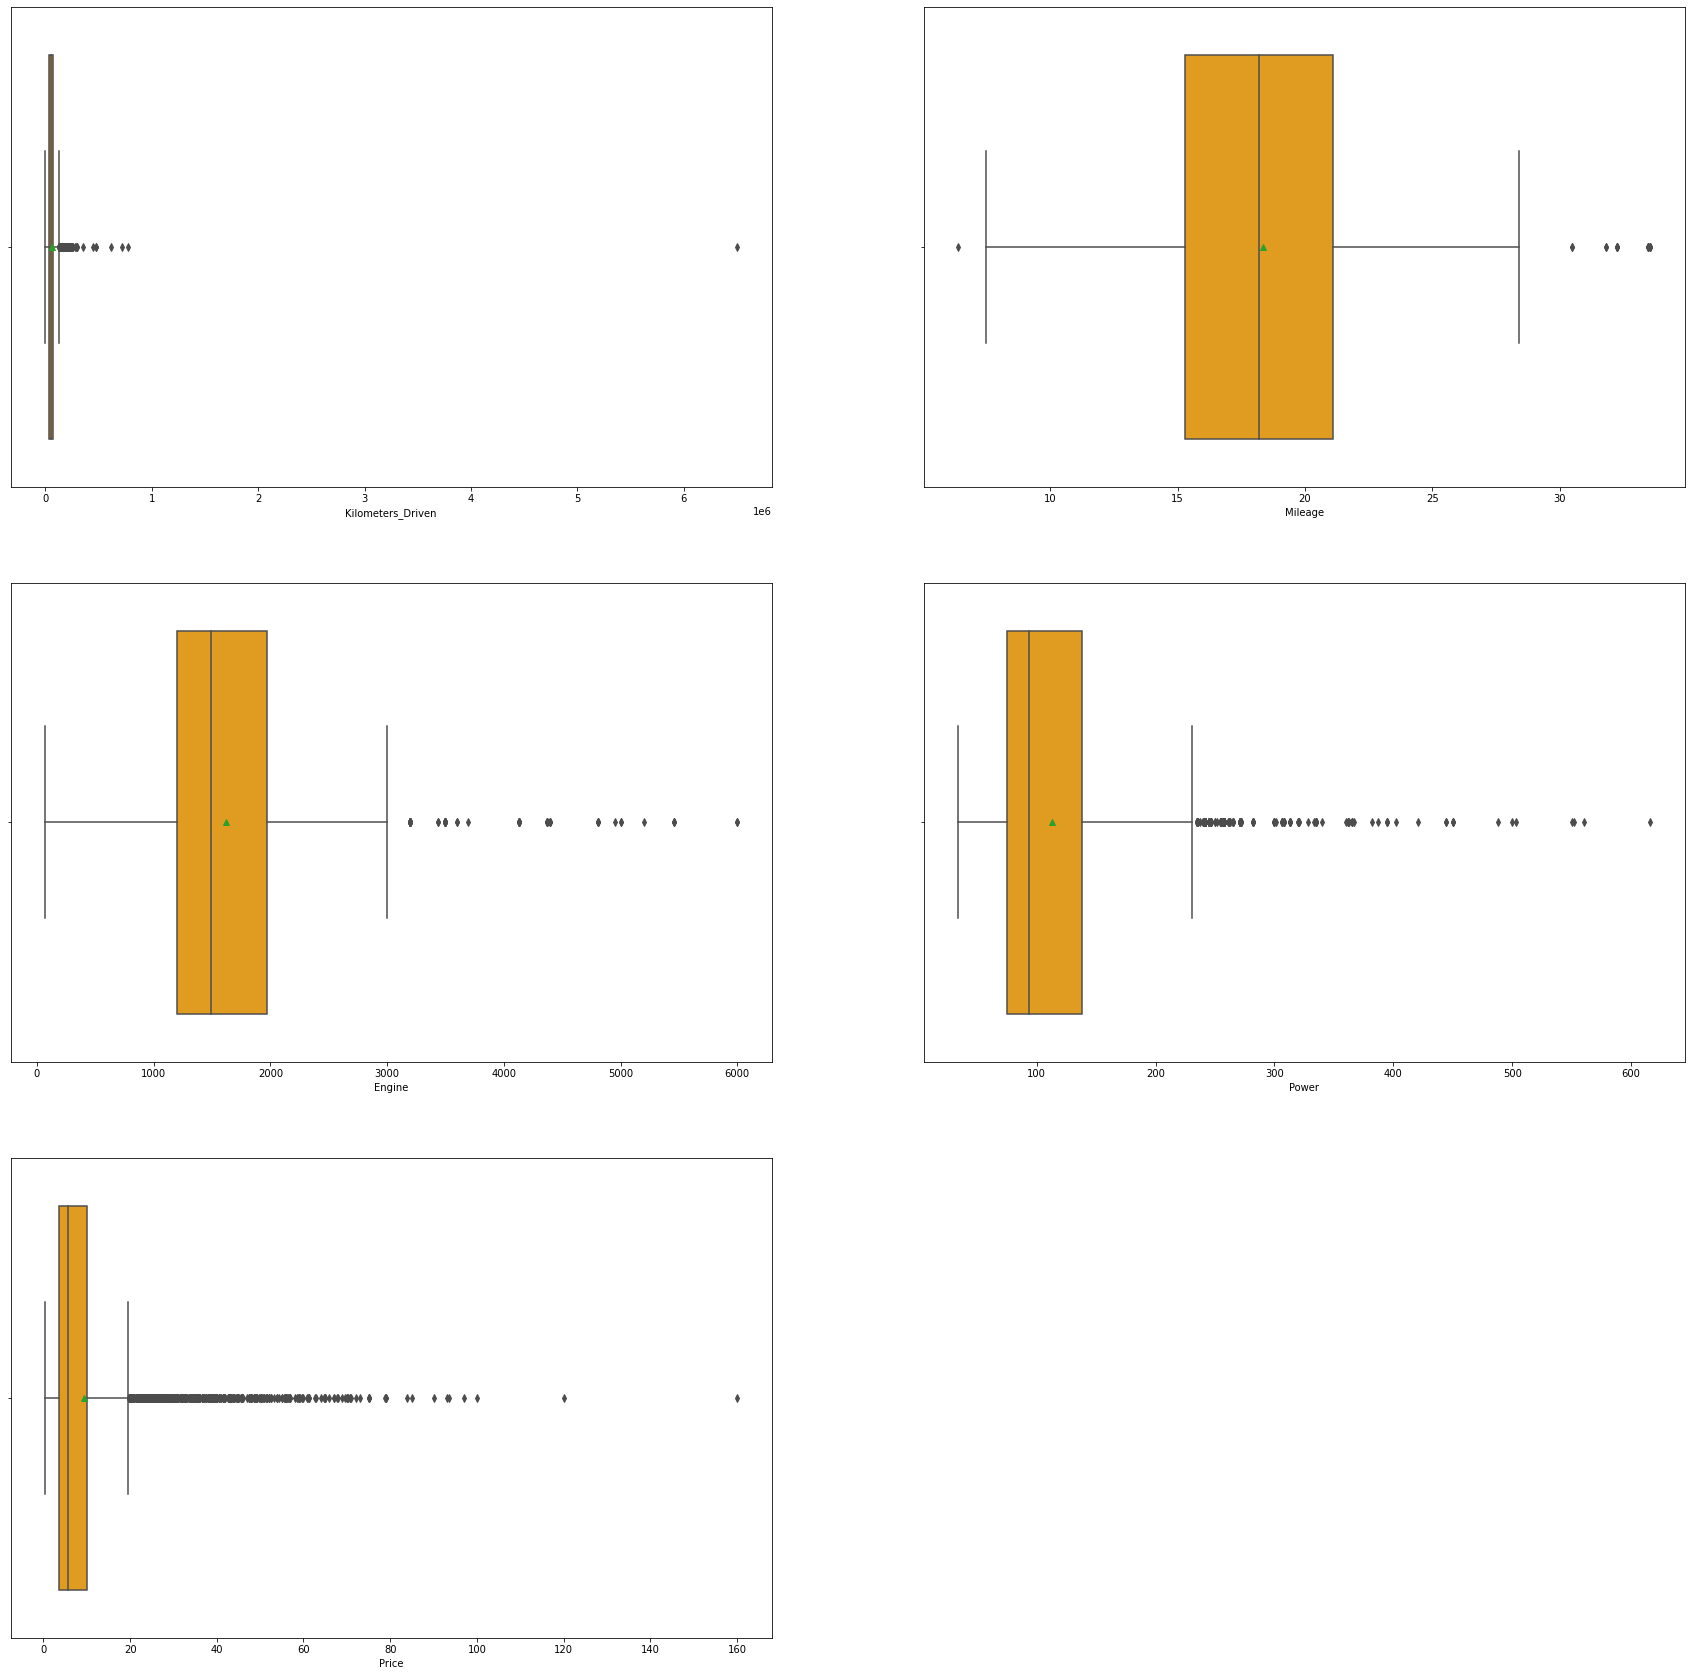

In [529]:
plt.figure(figsize = (30, 30))     # box plot for numercial variables
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x = df[col], showmeans=True, color = 'orange')   # show the position of mean

**observation:**
- The distribution of Mileage approaches normal distribution.
- Kilometers_Driven and Price are very skewed, with lots of outliers on the right. 

#### distribution of categorical variable

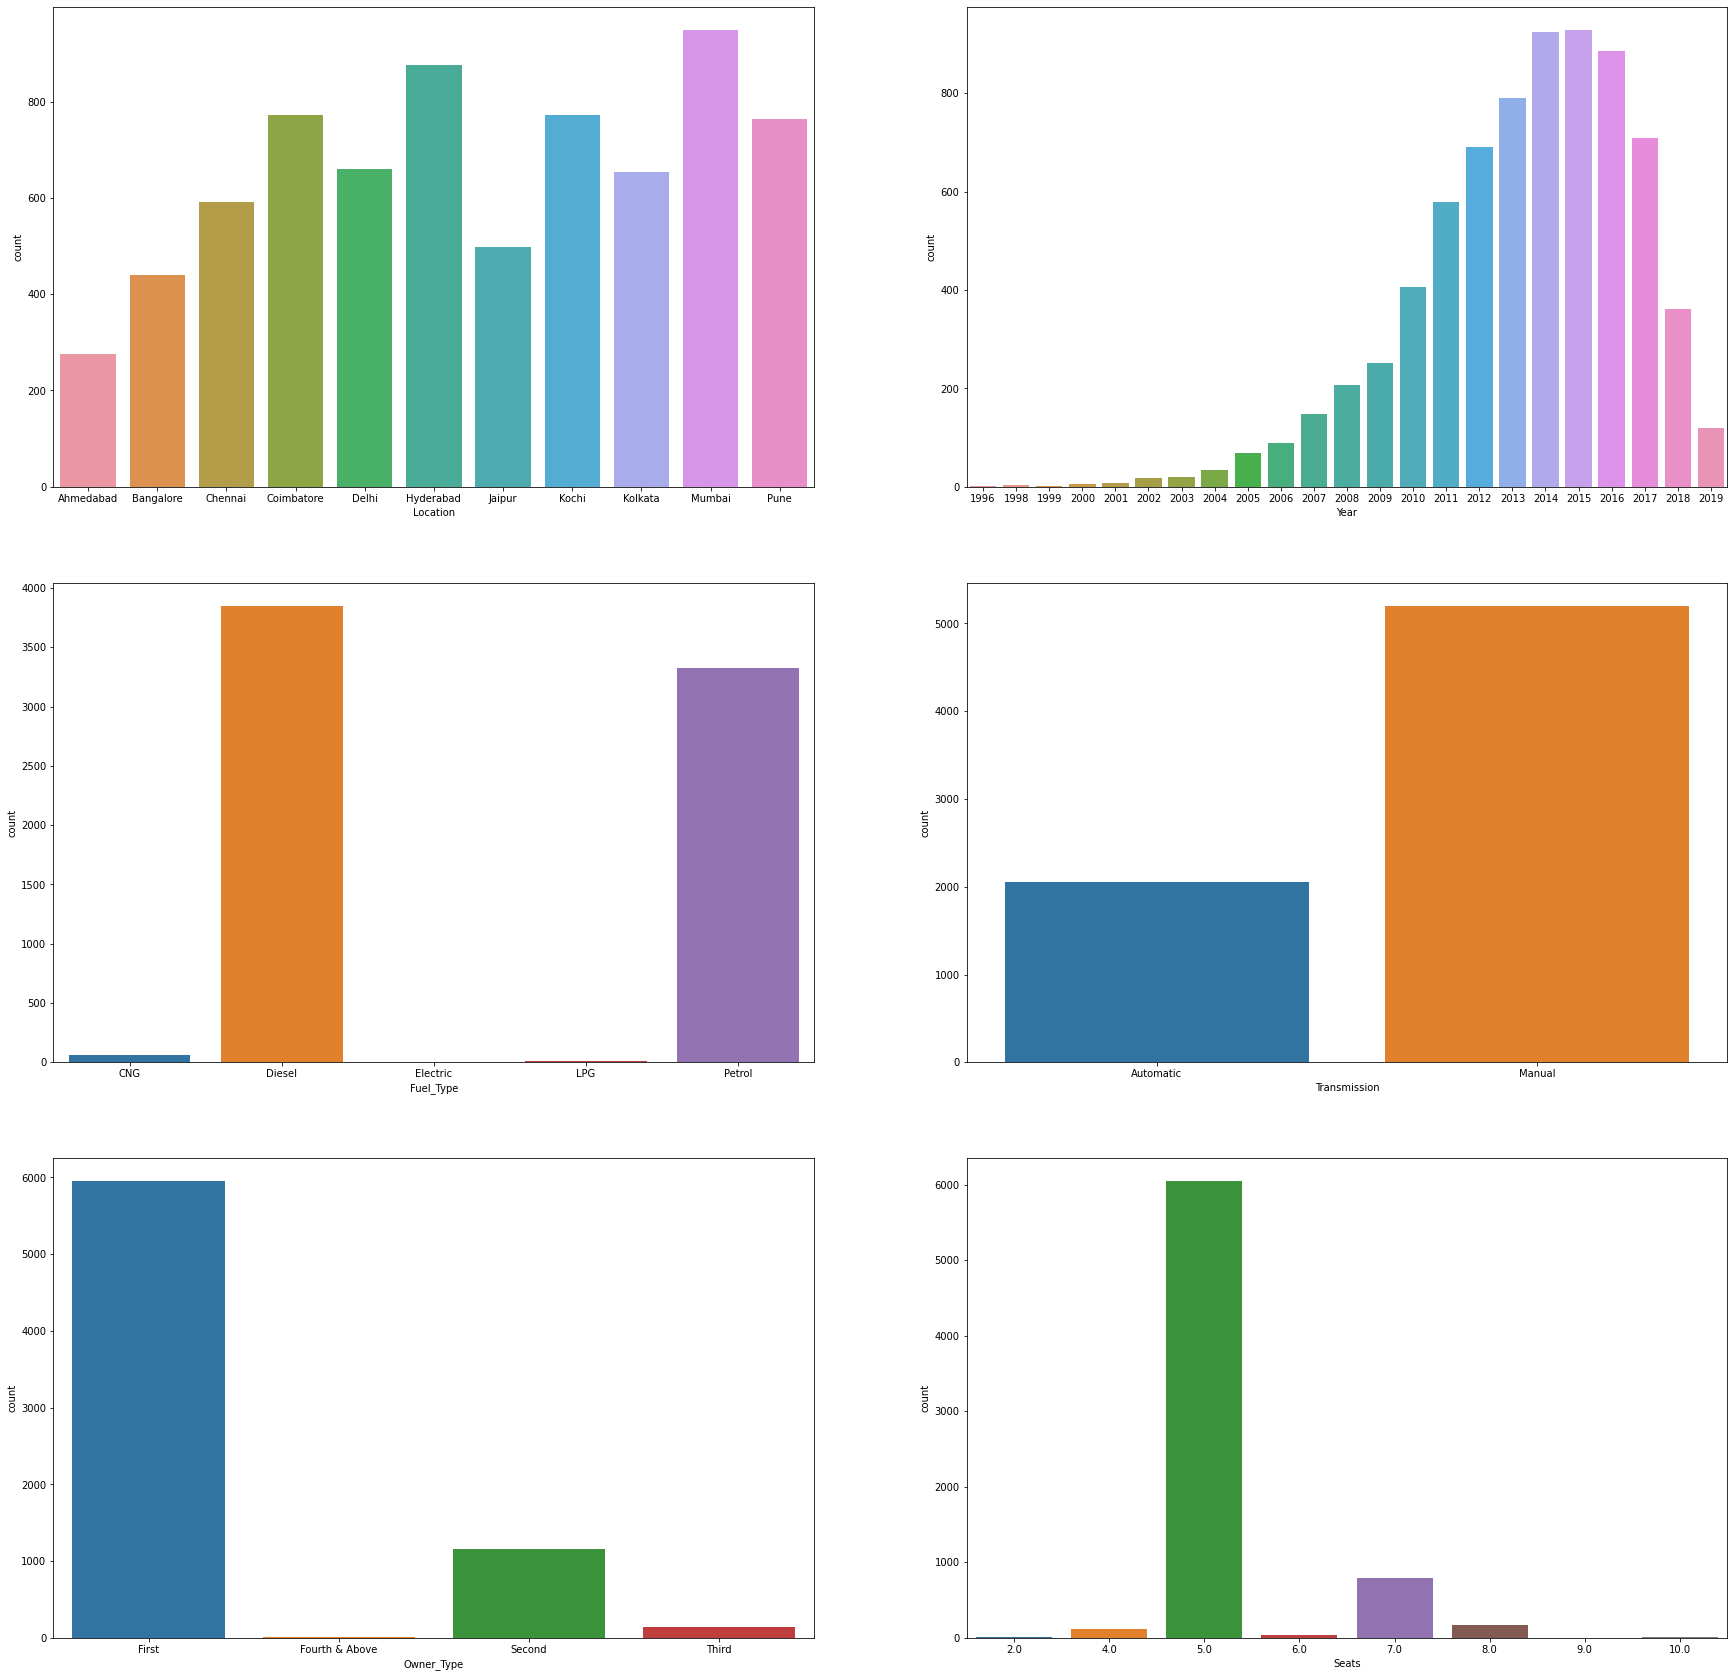

In [530]:
plt.figure(figsize = (30, 30)) 
for i, col in enumerate(categorical_columns[: -1]):  # categorical variables except Brand
    plt.subplot(3, 2, i + 1)
    sns.countplot(df[col])

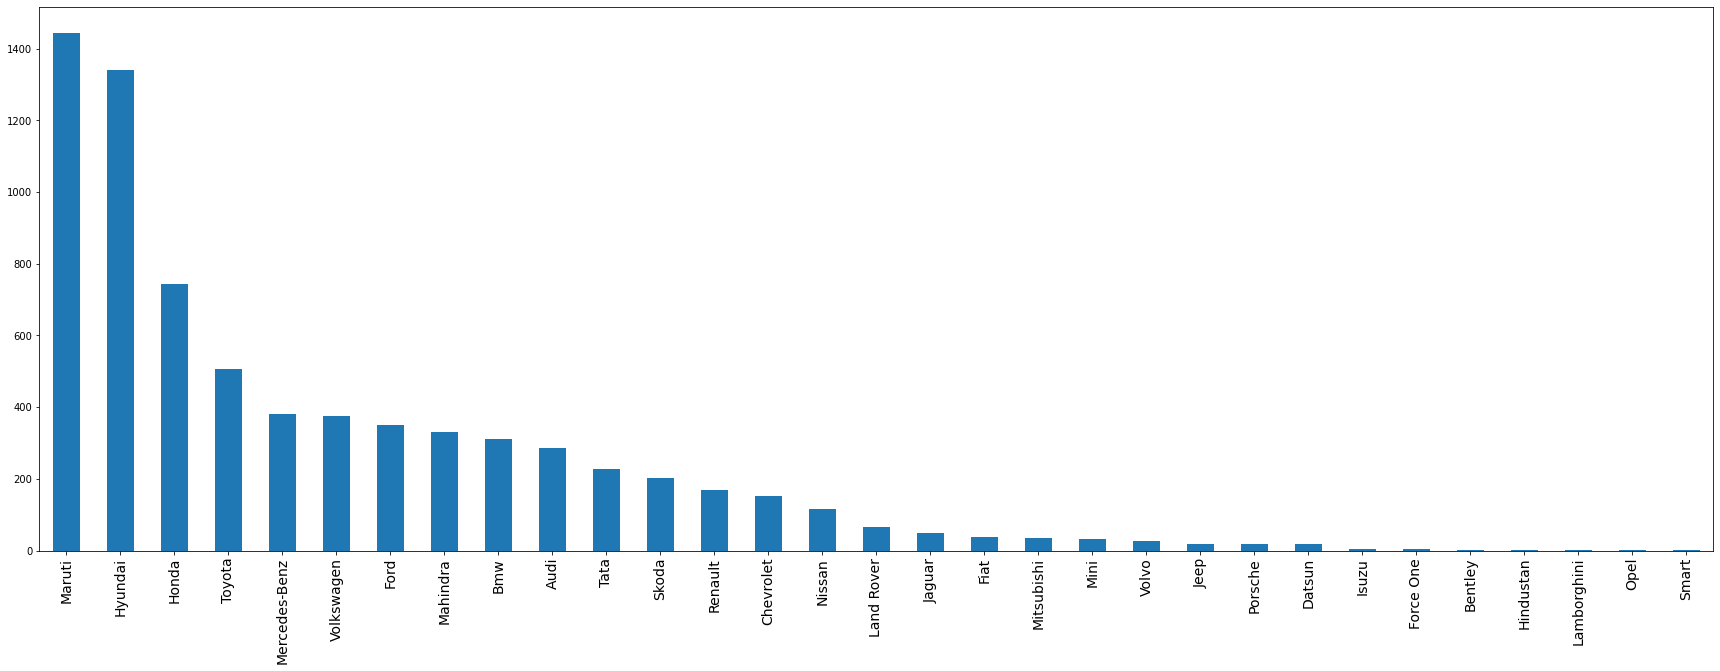

In [531]:
plt.figure(figsize = (30, 10))
df.Brand.value_counts().plot(kind = "bar")    # countplot for Brand
plt.xticks(fontsize = 14, rotation = 90);
plt.show()

**observation:**
- Cars are approximately evenly distributed among 11 cities.
- Manufacturing years are between 1996 - 2019, most concentring on 2010- 2018. Few were manufactured before 2005.
- Most cars use Diesel and Petrol.
- Manual transmission cars are more than automatic transmission ones.
- Most cars have only 1 or 2 previous owner(s). Few have more than 3 owners.
- Most cars have 5 seats and 7 seats. only a few have 2 seats and more than 8 seats.
- The top three brands of used cars are Maruti, Hyundai and Honda.

### Bivariate Analysis

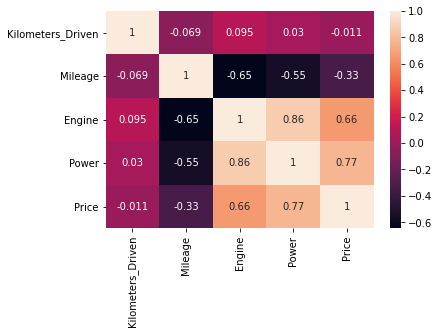

In [534]:
sns.heatmap(data = df.corr(), annot = True);   # generate heatmap

**observation:** 
- It shows Mileage and Engine/ Power are negatively correlated, while Engine and Power are positively correlated. It corresponding to the fact that the higher an engine's displacement the more power it can creates, therefore more fuel is consumed since it draws in more of the air/fuel mixture per revolution.
- Price and Engine/ Power are positively correlated.

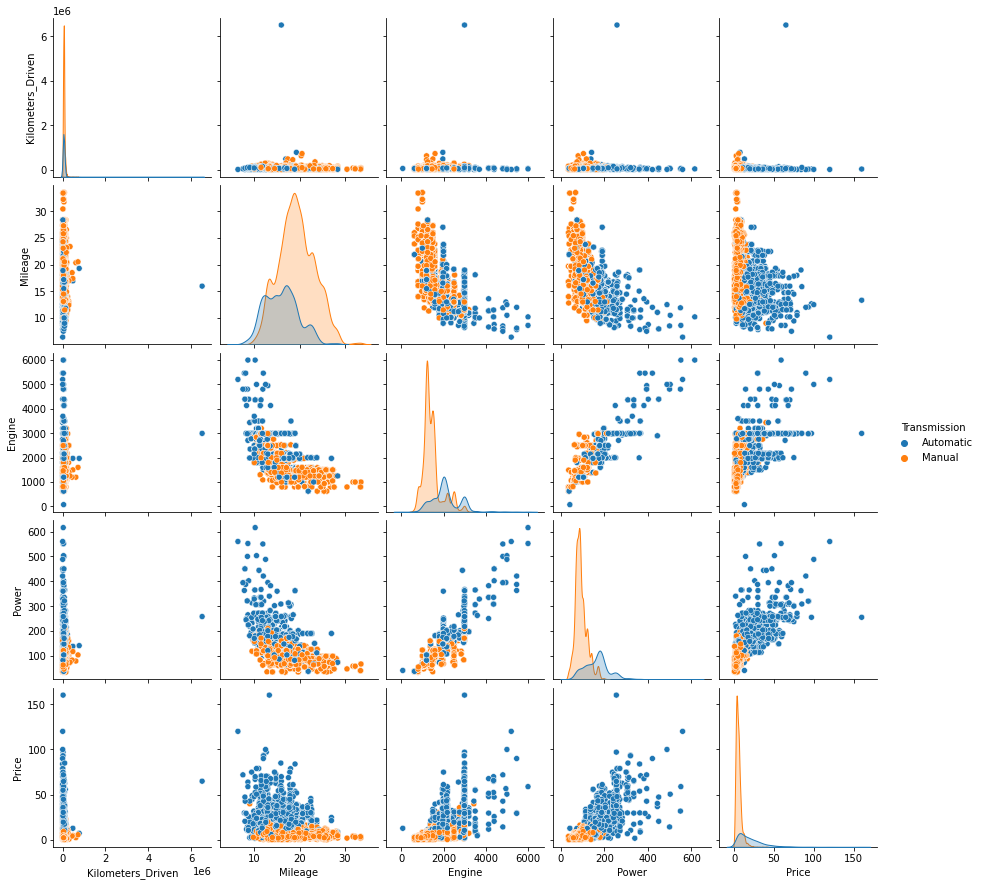

In [535]:
sns.pairplot(df, hue = 'Transmission'); 

**observation:**
- Automatic transmission cars tend to have higher displacement volume, maximum power and price.
- Whatever transmission it is, Power and Engine shows high correlation, while Mileage and Engine/ Power shows negative correlation.
- Price is positively correlated with Engine/ Power.
- Price doesn't have much correlation with Kilometers_Driven.

#### Price vs Brand

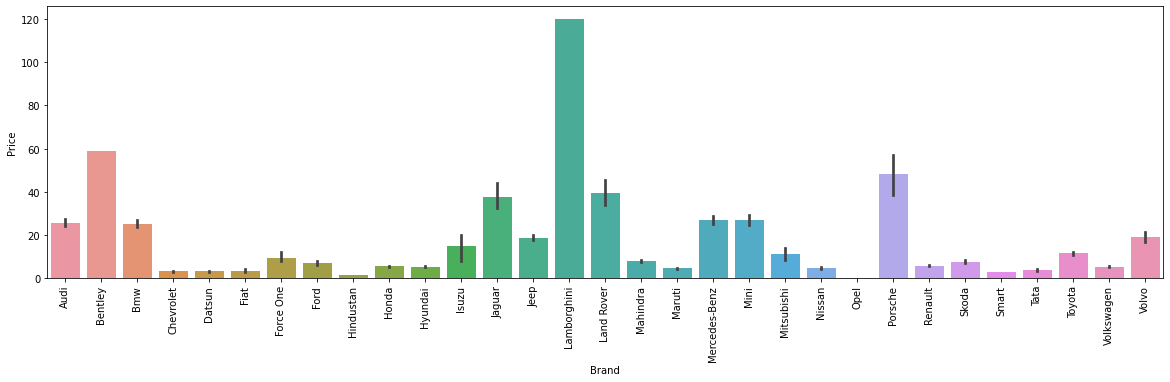

In [536]:
plt.figure(figsize = (20, 5))
sns.barplot(x = 'Brand', y = 'Price', data = df);
plt.xticks(rotation = 90);

**observation:** Price vary dramaticlly among brands. The highest price belongs to Lamborghini. Other brands with higher price are Porsche, Bentley, Jaguar, Land Rover, Audi, BMW, Mercedes-Benz and Mini. All are luxury brands.

#### Price vs Seats

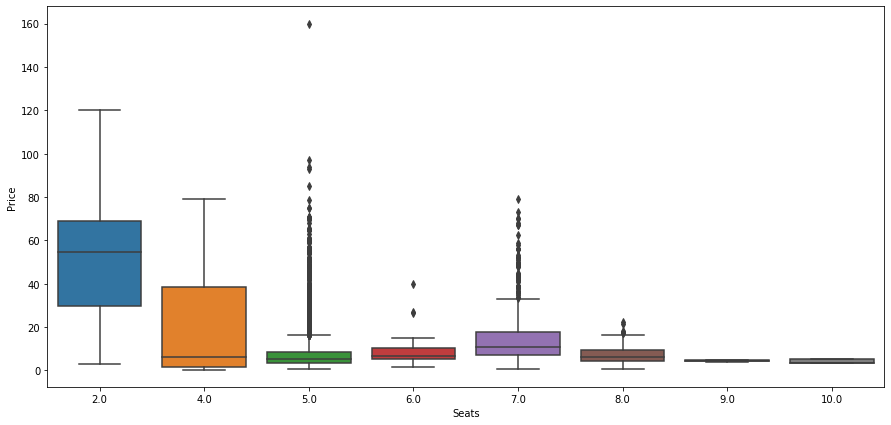

In [537]:
plt.figure(figsize = (15,7))
sns.boxplot(x = 'Seats', y = 'Price', data = df);

In [538]:
df.loc[df.Seats == 2]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
134,Kolkata,2017,13372,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,54.00,Mercedes-Benz
557,Delhi,2013,12100,Petrol,Automatic,First,9.90,1984.0,207.80,2.0,29.50,Audi
693,Coimbatore,2016,22732,Petrol,Automatic,First,18.10,3498.0,306.00,2.0,55.54,Mercedes-Benz
798,Bangalore,2015,10000,Petrol,Automatic,First,18.10,3498.0,306.00,2.0,55.00,Mercedes-Benz
915,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,3.00,Smart
926,Hyderabad,2010,10000,Petrol,Manual,First,9.00,3436.0,NaN,2.0,40.00,Porsche
1078,Kolkata,2015,10512,Petrol,Automatic,First,8.60,2706.0,265.00,2.0,64.00,Porsche
1288,Kochi,2014,14262,Petrol,Automatic,First,9.90,1984.0,207.80,2.0,27.35,Audi
2095,Coimbatore,2019,2526,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,83.96,Mercedes-Benz
2305,Mumbai,2011,8000,Petrol,Automatic,First,9.00,3436.0,NaN,2.0,43.00,Porsche


**observation:** cars with more than 8 seats tend to have lower price. Cars with 2 seats are more expensive than other categories. By extracting the data in this category, we could see almost all of them belong to those luxury brands.

#### Price vs Owner_Type

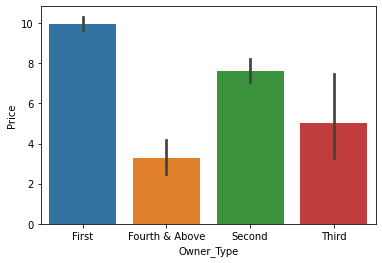

In [539]:
sns.barplot(x = 'Owner_Type', y = 'Price', data = df);

**observation:** The fewer previous owner it has, the higher the price.

#### Price vs Transmission

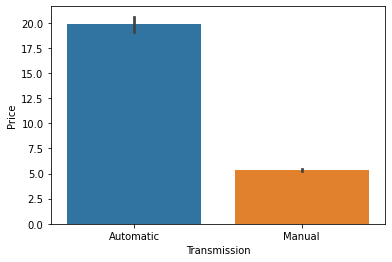

In [540]:
sns.barplot(x = 'Transmission', y = 'Price', data = df);

**observation:** Automatic transmission cars are more expensive.

#### Price vs Fuel_Type

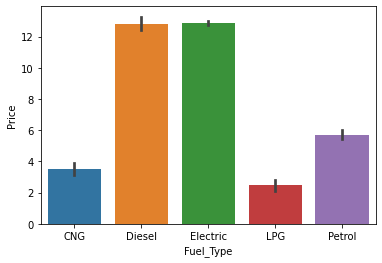

In [541]:
sns.barplot(x = 'Fuel_Type', y = 'Price', data = df);

**observation:** Electric cars and diesel cars are the most expensive. Cars using gases are the most affordable.

#### Price vs Year

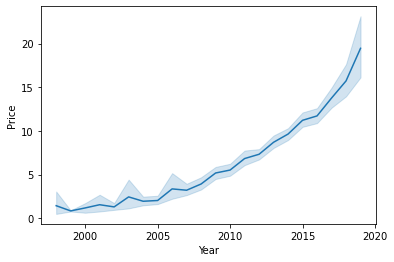

In [542]:
sns.lineplot(x = 'Year', y = 'Price', data = df);

**observation:** the newer the car, the higher the price.

#### Price vs Location

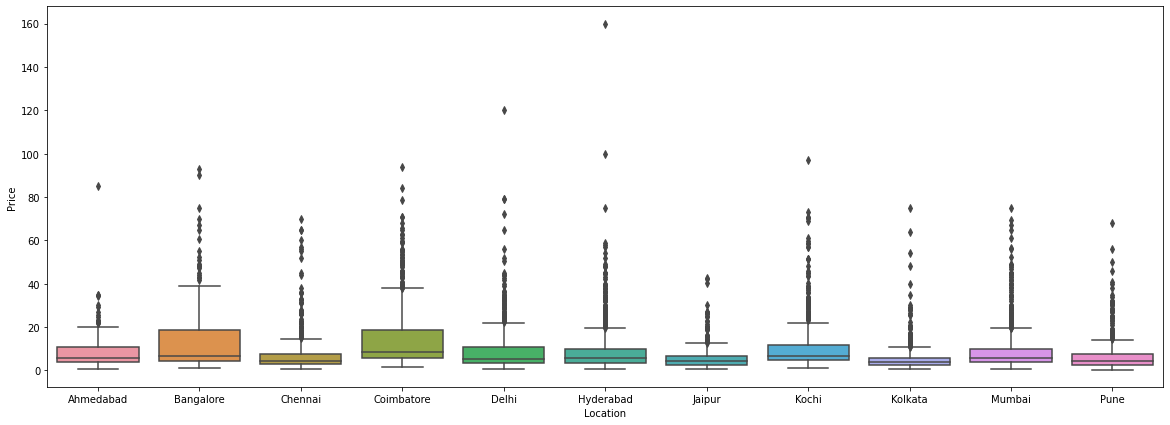

In [543]:
plt.figure(figsize = (20, 7))
sns.boxplot(x = 'Location', y = 'Price', data = df);

**observation:** Price is not closely related to location of the car.

#### Price vs Transmission vs Brand

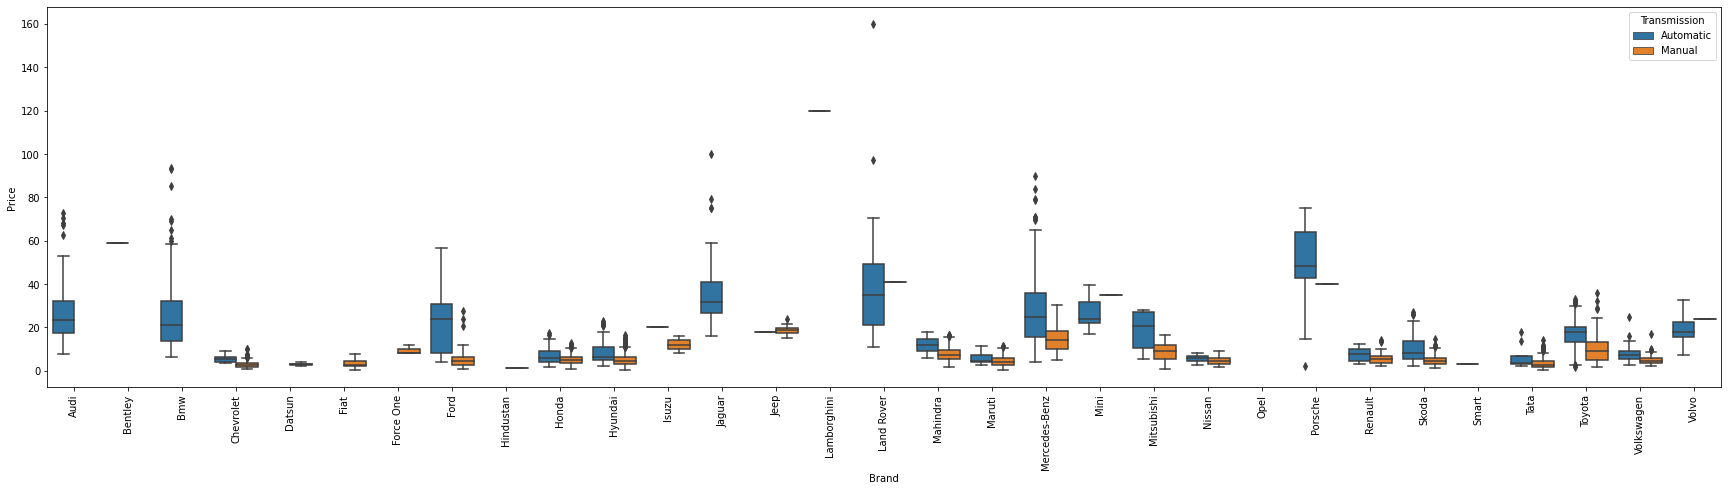

In [544]:
plt.figure(figsize = (30,7))
sns.boxplot(x = 'Brand', y = 'Price', hue = 'Transmission', data =df);
plt.xticks(rotation = 90);

**observation:** the price for automatic transmission is higher for each brand.

 #### Price vs Fuel_Type vs Brand

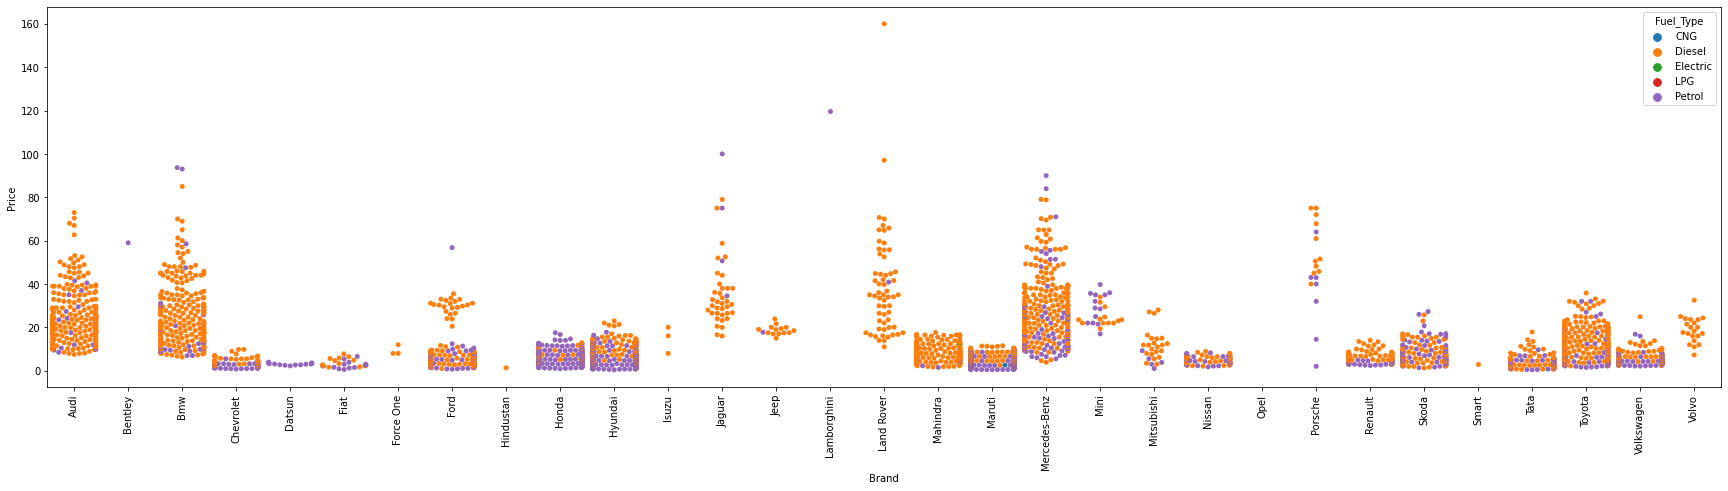

In [545]:
plt.figure(figsize = (30,7))
sns.swarmplot(x = 'Brand', y = 'Price', hue = 'Fuel_Type', data = df);
plt.xticks(rotation = 90);

**observation:** diesel cars are more expensive than petrol cars for all brands except Honda.

#### Power vs Fuel_Type

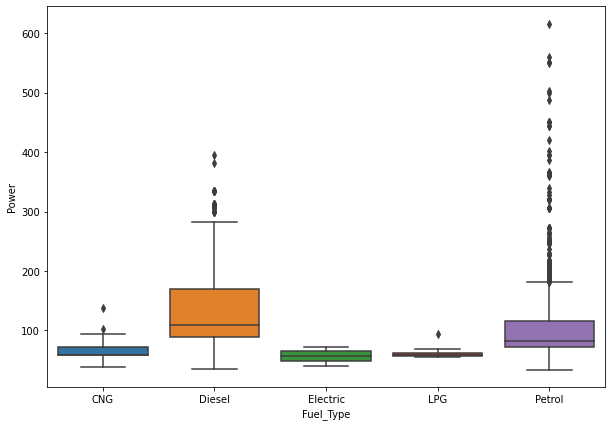

In [546]:
plt.figure(figsize = (10,7))
sns.boxplot(y = 'Power', x = 'Fuel_Type', data = df);

**observation:** Electric/ LPG/ CNG cars have similar power, which is lower than that of diesel cars and petrol cars. Diesel cars have higher power than petrol cars.

#### Power vs Year vs Fuel_Type

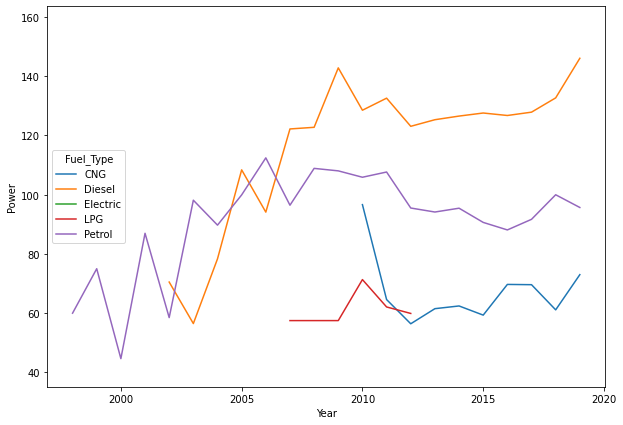

In [547]:
plt.figure(figsize = (10,7))
sns.lineplot(x = 'Year', y = 'Power', hue = 'Fuel_Type', data = df, ci = None);

In [548]:
df.loc[df.Fuel_Type == 'Electric']  # only two electric cars

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
4446,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00,Mahindra
4904,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75,Toyota


**observation:** new diesel and petrol cars tend to have higher Power. LPG and CNG cars have stable power. The reason why electric cars don't show on the plot is because we have too few electric car data points in our data set.

#### Price vs Transmission vs Fuel_Type

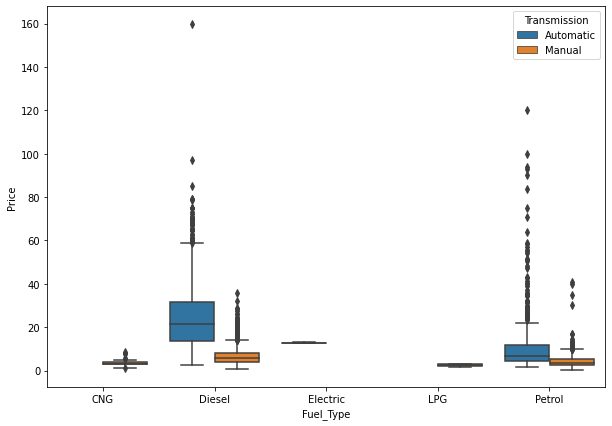

In [549]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Fuel_Type', y = 'Price', hue = 'Transmission', data = df);

**observation:** LPG and CNG cars only have manual transmission. Electric cars only have automatic transmission. Diesel cars and petrol cars have both transmissions, and automatic transmission ones are more expensive.

In [550]:
phase4 = df.copy()   # delete !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [551]:
df = phase4.copy() # univariate analysis and bivariate analysis completed. delete !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Data preprocessing - part 2

#### fill the missing values in Mileage, Engine, Power, Seats and Price column

In [20]:
# fill the missing values with median
df[['Mileage', 'Engine', 'Power', 'Seats', 'Price']] = df[['Mileage', 'Engine', 'Power', 'Seats', 'Price']].apply(lambda x: x.fillna(x.median()))
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [21]:
df.isnull().sum()    # check missing values again

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [22]:
df[['Mileage', 'Engine', 'Power', 'Seats', 'Price']].min()  # check the minimum again, now all have positive minimum

Mileage     6.40
Engine     72.00
Power      34.20
Seats       2.00
Price       0.44
dtype: float64